## Intro to object detection

Today we will take our first look at object detection. 

Our aim is to process an image, so that we can begin to extract and exploit the information embodied within it. 

Some image processing algorithms can be extremely computational intensive, and therefore take a very long time to process. 

Here, we will just cover a very basic approach as a first step, looking only at the Canny edge detector demo. 

## What is an edge detector?

We can detect significant local changes in the image intensity, which generally suggest edges between two different objects. 

Discontinuities in depth, surface orientation, scene illumination variations, and material properties changes lead to discontinuities in image brightness. 

Thus, applying an edge detection algorithm enables us to filter out information, while retaining pixels of interest (e.g., for building outlines, roads etc.). 

## What type of edge detection algorithms are available?

The approach is generally defined into two key categories:

- Traditional edge detection approaches
- Deep learning-based edge detection approaches

Here, we will only focus on traditional approaches, such as the Canny edge detector. 

## Canny Edge Detector

The Canny Edge Detection algorithm is named after John Canny, as per his paper entitled "A Computational Approach to Edge Detection" in 1986. 

It is one of the most widely used edge detection algorithms in today’s image processing applications. 

Generally, the approach can produce smoother, thinner, and cleaner images than competitors (e.g., Sobel and Prewitt filters).

As per the image below, the steps involved are as follows:

- The input image is smoothed.
- A Sobel filter is applied to detect the edges of the image. 
- Non-max suppression is then applied to local maximum pixels in the gradient direction (while suppressing the remaining). 
- Thresholding is used to remove pixels below a certain threshold, retaining pixels above a certain threshold. This helps to remove edges potentially formed due to noise. 
- Hysteresis tracking to make a pixel stronger if any of the 8 neighboring pixels are strong.

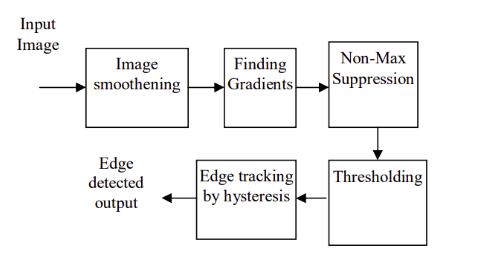

In [1]:
from IPython.display import Image
Image("images/canny_ed.png")

## A simple example

First, we will need to install both `scikit-image` and `opencv`, which will be quite large, so may take a moment. 

In [ ]:
# Example
# We need to use the functions provided by scikit-image
import sys
!conda install --yes --prefix {sys.prefix} scikit-image

In [ ]:
# Example
# We need to use the functions provided by opencv
import sys
!conda install --yes --prefix {sys.prefix} opencv

Next, we can import in our packages, and also load in a basic .png image for Old Town, Fairfax, as a demo. 


In [2]:
import cv2 
from skimage.metrics import mean_squared_error,peak_signal_noise_ratio,structural_similarity
import matplotlib.pyplot as plt

# File path
img_path = 'files/2023-10-25-00_00_2023-10-25-23_59_Sentinel-2_L2A_True_color.png'

# Reading the image
image = cv2.imread(img_path)
image

array([[[21, 32, 33],
        [22, 32, 34],
        [23, 33, 35],
        ...,
        [ 7, 22, 21],
        [ 5, 19, 18],
        [ 3, 16, 16]],

       [[21, 31, 33],
        [22, 32, 33],
        [23, 33, 34],
        ...,
        [ 6, 21, 19],
        [ 4, 17, 17],
        [ 2, 15, 14]],

       [[20, 30, 31],
        [21, 30, 31],
        [22, 31, 32],
        ...,
        [ 4, 19, 18],
        [ 2, 16, 15],
        [ 1, 14, 12]],

       ...,

       [[21, 24, 26],
        [19, 23, 24],
        [16, 22, 22],
        ...,
        [ 8, 17, 17],
        [ 8, 18, 18],
        [ 8, 19, 19]],

       [[17, 21, 22],
        [15, 20, 20],
        [13, 19, 18],
        ...,
        [ 7, 16, 17],
        [ 8, 18, 17],
        [ 8, 19, 18]],

       [[13, 18, 18],
        [11, 17, 16],
        [ 9, 16, 15],
        ...,
        [ 7, 15, 16],
        [ 7, 17, 17],
        [ 8, 18, 18]]], dtype=uint8)

Next, we will first greyscale the image, and then secondly apply Gaussian blurring.  

In [3]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Blur the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
blurred

array([[31, 31, 32, ..., 19, 17, 16],
       [30, 30, 31, ..., 19, 16, 15],
       [29, 29, 29, ..., 17, 15, 14],
       ...,
       [23, 22, 21, ..., 16, 17, 17],
       [20, 20, 18, ..., 15, 16, 17],
       [19, 18, 17, ..., 15, 16, 17]], dtype=uint8)

Finally, we can utilize the `cv2` function `Canny`, which applies the edge detection algorithm to our image.

In [5]:
# Perform the canny operator
canny = cv2.Canny(blurred, 30, 150)
canny

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Now we can visualize using `matplotlib`.

(-0.5, 1041.5, 866.5, -0.5)

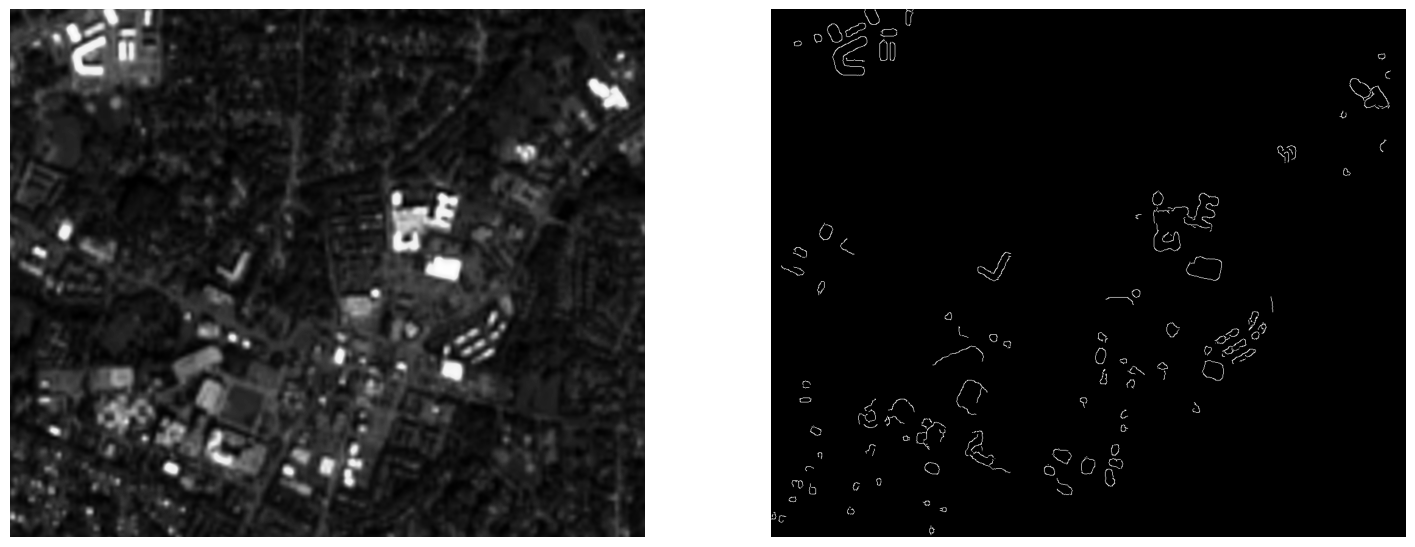

In [6]:
# Visualize
fig,ax =  plt.subplots(1,2,figsize=(18, 18))
ax[0].imshow(gray,cmap='gray')
ax[1].imshow(canny,cmap='gray')
ax[0].axis('off')
ax[1].axis('off')

Next week, we will go over this process in detail. 

For the time being, you should think critically about the outputs obtained from this application, and how we might improve them.
